In [205]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer


In [206]:
# Load the dataset
data = pd.read_csv('~/Desktop/dementia_patients_health_data.csv')

# Display the first few rows of the dataset
data.head()


,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1


Handle Missing Values: Identify and handle any missing values in the dataset.
Encode Categorical Variables: Convert categorical variables into numerical format using encoding techniques.
Feature Selection and Engineering: Select relevant features and create new features if necessary.

In [207]:
data.shape

(1000, 24)

In [208]:
data.dtypes

Diabetic                       int64
AlcoholLevel                 float64
HeartRate                      int64
BloodOxygenLevel             float64
BodyTemperature              float64
Weight                       float64
MRI_Delay                    float64
Prescription                  object
Dosage in mg                 float64
Age                            int64
Education_Level               object
Dominant_Hand                 object
Gender                        object
Family_History                object
Smoking_Status                object
APOE_ε4                       object
Physical_Activity             object
Depression_Status             object
Cognitive_Test_Scores          int64
Medication_History            object
Nutrition_Diet                object
Sleep_Quality                 object
Chronic_Health_Conditions     object
Dementia                       int64
dtype: object

In [209]:
data.describe()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Dosage in mg,Age,Cognitive_Test_Scores,Dementia
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,485.000000,1000.000000,1000.000000,1000.000000
mean,0.513000,0.098429,79.383000,95.226051,36.761513,74.321326,30.103568,9.213402,74.908000,6.383000,0.485000
std,0.500081,0.058715,12.107556,2.929262,0.431701,14.463765,16.862170,6.493188,9.095068,3.180633,0.500025
min,0.000000,0.000414,60.000000,90.010677,36.002108,50.069731,0.094684,1.500000,60.000000,0.000000,0.000000
25%,0.000000,0.045505,68.000000,92.875017,36.395363,61.387339,16.237371,4.000000,67.000000,4.000000,0.000000
50%,1.000000,0.098235,79.000000,95.390420,36.784319,74.149204,29.577194,8.000000,75.000000,8.000000,0.000000
75%,1.000000,0.151840,90.000000,97.785111,37.126655,87.024034,44.176723,12.000000,83.000000,9.000000,1.000000
max,1.000000,0.199866,100.000000,99.999230,37.496809,99.982722,59.957599,23.000000,90.000000,10.000000,1.000000


In [210]:
#Handle Missing Values
data['Prescription'].fillna('None', inplace=True)
data['Dosage in mg'].fillna(0, inplace=True)


In [211]:
data.columns

Index(['Diabetic', 'AlcoholLevel', 'HeartRate', 'BloodOxygenLevel',
       'BodyTemperature', 'Weight', 'MRI_Delay', 'Prescription',
       'Dosage in mg', 'Age', 'Education_Level', 'Dominant_Hand', 'Gender',
       'Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity',
       'Depression_Status', 'Cognitive_Test_Scores', 'Medication_History',
       'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions',
       'Dementia'],
      dtype='object')

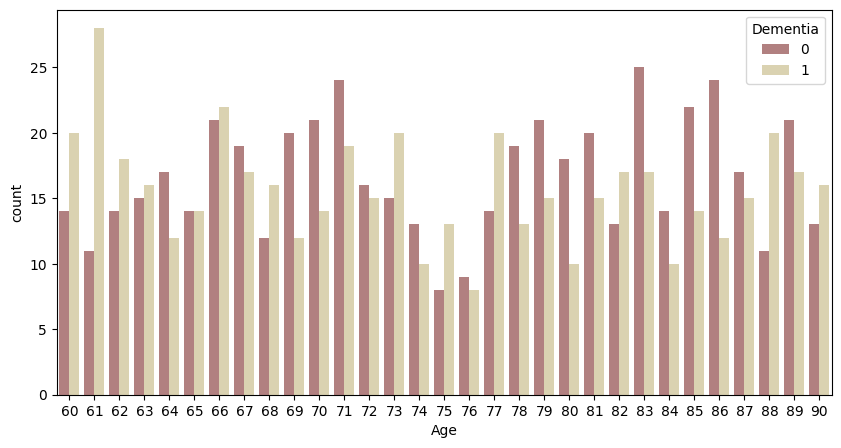

In [247]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Age', hue='Dementia', palette='pink')

plt.show()

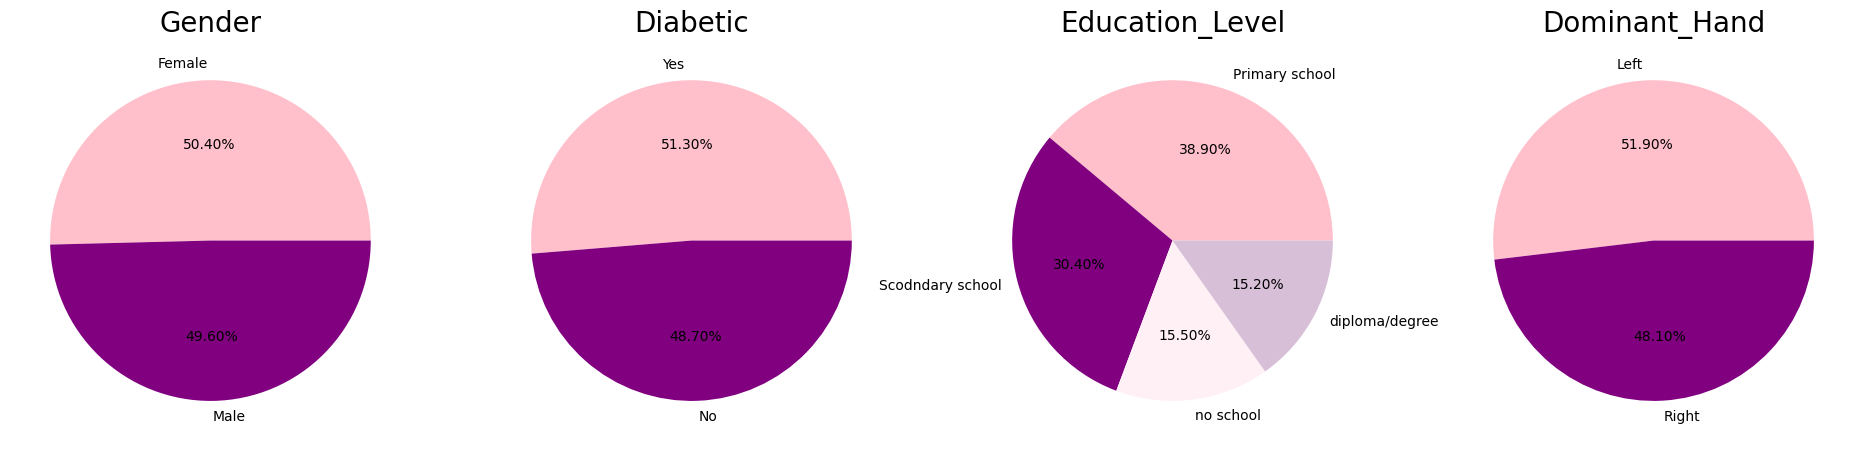

In [246]:
plt.rcParams['figure.figsize'] = (30, 12)

# Create a subplot with five pie charts side by side
plt.subplot(1, 5, 1)
size = data['Gender'].value_counts()
labels = 'Female', 'Male'
color = ['pink', 'purple']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = data['Diabetic'].value_counts()
labels = 'Yes', 'No'
color = ['pink', 'purple']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Diabetic', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = data['Education_Level'].value_counts()
labels = 'Primary school', 'Scodndary school', 'no school', 'diploma/degree'
color = ['pink', 'purple', 'lavenderblush', 'thistle']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Education_Level', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = data['Dominant_Hand'].value_counts()
labels = 'Left', 'Right'
color = ['pink', 'purple']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Dominant_Hand', fontsize=20)
plt.axis('off')



plt.grid()
plt.show()

Encode Categorical Variables

In [217]:
#Encode Categorical Variables
categorical_features = ['Education_Level', 'Dominant_Hand', 'Gender', 'Family_History', 
                        'Smoking_Status', 'APOE_ε4', 'Physical_Activity', 'Depression_Status',
                        'Medication_History', 'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions', 'Prescription']

numerical_features = ['Diabetic', 'AlcoholLevel', 'HeartRate', 'BloodOxygenLevel', 'BodyTemperature', 
                      'Weight', 'MRI_Delay', 'Age', 'Cognitive_Test_Scores', 'Dosage in mg']



In [218]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [219]:
# Models that I will be using
models = {
    'SVM': SVC(probability=True, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=10000, random_state=42)
}


In [220]:
X = data.drop('Dementia', axis=1)
y = data['Dementia']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [221]:
# Training and storing each model in the pipeline
trained_pipelines = {}
for model_name, model in models.items():
    try:
        # Creating a pipeline with the preprocessor and the model
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', model)])
        
        # Training the model
        pipeline.fit(X_train, y_train)
        
        # Storing the trained pipeline
        trained_pipelines[model_name] = pipeline
        print(f"{model_name} model trained successfully.")
    except Exception as e:
        print(f"Error training {model_name} model: {e}")

    
    

SVM model trained successfully.
LogisticRegression model trained successfully.


In [222]:
# Debugging
print("Trained models:", trained_pipelines.keys())

Trained models: dict_keys(['SVM', 'LogisticRegression'])


In [223]:
# Function to make a prediction with user input
def predict_dementia(model_name, user_input):
    model = trained_pipelines[model_name]
    
    # Convert user input into a dataframe
    user_input_df = pd.DataFrame([user_input])
    
    # Make prediction
    prediction = model.predict(user_input_df)
    prediction_proba = model.predict_proba(user_input_df)[:, 1]
    
    return prediction[0], prediction_proba[0]

In [224]:
# Function to evaluate the models
def evaluate_model(model_name):
    if model_name not in trained_pipelines:
        raise ValueError(f"Model {model_name} is not trained.")
    
    model = trained_pipelines[model_name]
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"Evaluation for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(class_report)
    print(f"ROC-AUC Score: {roc_auc:.4f}")

In [225]:
# Evaluate each model
for model_name in trained_pipelines:
    evaluate_model(model_name)

Evaluation for SVM:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

ROC-AUC Score: 1.0000
Evaluation for LogisticRegression:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

ROC-AUC Score: 1.0000


In [226]:
#User input 
user_input_example = {
    'Diabetic': 1,
    'AlcoholLevel': 0.5,
    'HeartRate': 88,
    'BloodOxygenLevel': 98.0,
    'BodyTemperature': 37.0,
    'Weight': 86.0,
    'MRI_Delay': 5.0,
    'Prescription': 'None',
    'Dosage in mg': 0.0,
    'Age': 25,
    'Education_Level': 'College',
    'Dominant_Hand': 'Left',
    'Gender': 'Female',
    'Family_History': 'No',
    'Smoking_Status': 'Never',
    'APOE_ε4': 'Negative',
    'Physical_Activity': 'Regular',
    'Depression_Status': 'None',
    'Cognitive_Test_Scores': 25,
    'Medication_History': 'None',
    'Nutrition_Diet': 'Balanced',
    'Sleep_Quality': 'Good',
    'Chronic_Health_Conditions': 'None'
}

In [227]:
# Prediction
model_name_to_use = 'SVM'  
prediction, probability = predict_dementia(model_name_to_use, user_input_example)

print(f'Prediction: {"Dementia" if prediction == 1 else "No Dementia"}')
print(f'Probability of Dementia: {probability:.2f}')

Prediction: Dementia
Probability of Dementia: 0.59


### Summary:
The two models were able to perfectly classify the patient outcomes. Although this is not always the case, the acuracy score can deacrease with an increase in data points. Additionally further testing needs to be done to make sure that the model is not overfitting. For further validation, the following steps could be done: 

1. **Cross-Validation**: Use cross-validation to evaluate and validate the performance of the model 
2. **Feature Importance**: Determine which features have the greatest influence on predictions by analyzing the relevance of each attribute.
3. **Additional Models**: Compare performance with other models like Random Forest or gradient boosting.
4. **Data Augmentation**: Increase data for validation.
